In [1]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk import flatten

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset..

df =pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# checking the features, their shape, duplicate, missing values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))


Features Present in the Dataset: 
 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Total Number of Rows :  18249
Total Number of Features :  14


Data Types of Features :
 Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Dataset contains any NaN/Empty cells :  False

Total number of empty rows in each feature:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year      

As we can see the data set there are 18249 rows and 14 columns,most of the column are of same data type that is float and Date, type and region is of object data type and ther is no empty rows.

<AxesSubplot:>

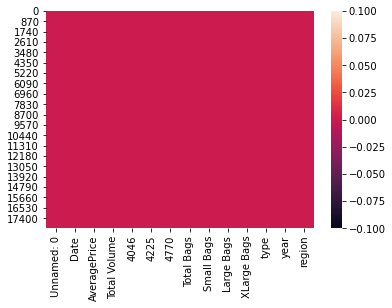

In [4]:
#using heatmap for checking null values
sns.heatmap(df.isnull())

In [10]:
df.groupby(['year'])['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [11]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [12]:
#Dropping index features that is not adding any important information
df.drop('Unnamed: 0',
             axis = 1,
             inplace = True)


In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

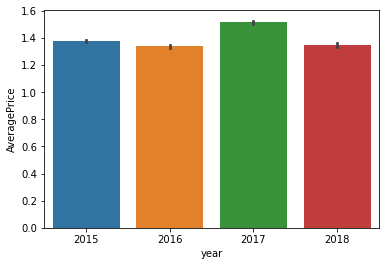

In [14]:
#Data Visualization:
sns.barplot(x='year', y= 'AveragePrice', data= df)

we can see that maximum average price year is 2017

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

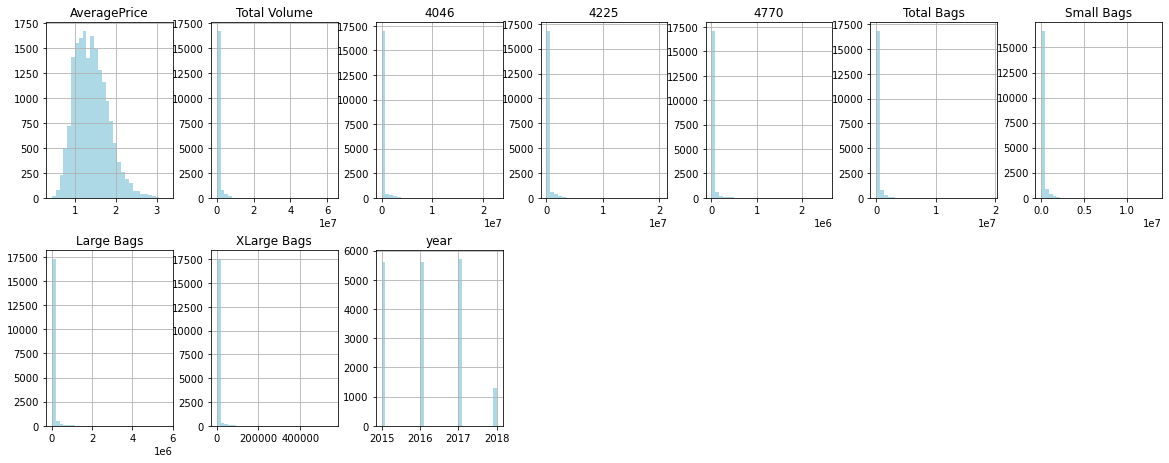

In [15]:
# Checking the Distribution using the histogram plot.

df.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue')

In [16]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [17]:
skew=('Total Volume', '4046','4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for col in skew:
    if df.skew().loc()[col]>0.55:
        df[col]= np.log1p(df[col])
        


In [18]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

AveragePrice       AxesSubplot(0.125,0.826831;0.227941x0.053169)
Total Volume    AxesSubplot(0.398529,0.826831;0.227941x0.053169)
4046            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
4225               AxesSubplot(0.125,0.763028;0.227941x0.053169)
4770            AxesSubplot(0.398529,0.763028;0.227941x0.053169)
Total Bags      AxesSubplot(0.672059,0.763028;0.227941x0.053169)
Small Bags         AxesSubplot(0.125,0.699225;0.227941x0.053169)
Large Bags      AxesSubplot(0.398529,0.699225;0.227941x0.053169)
XLarge Bags     AxesSubplot(0.672059,0.699225;0.227941x0.053169)
year               AxesSubplot(0.125,0.635423;0.227941x0.053169)
dtype: object

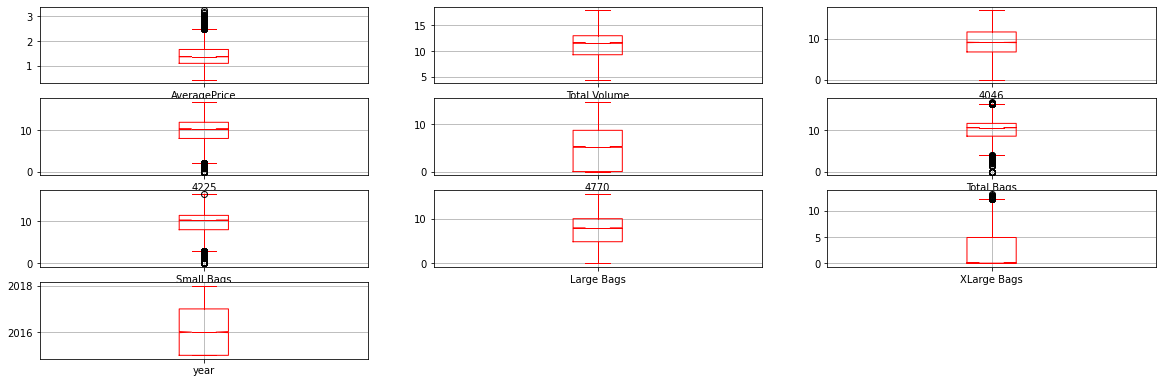

In [19]:
#Checking the outliers

df.plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20),grid=True, notch=True, color='red',legend=True)

[]

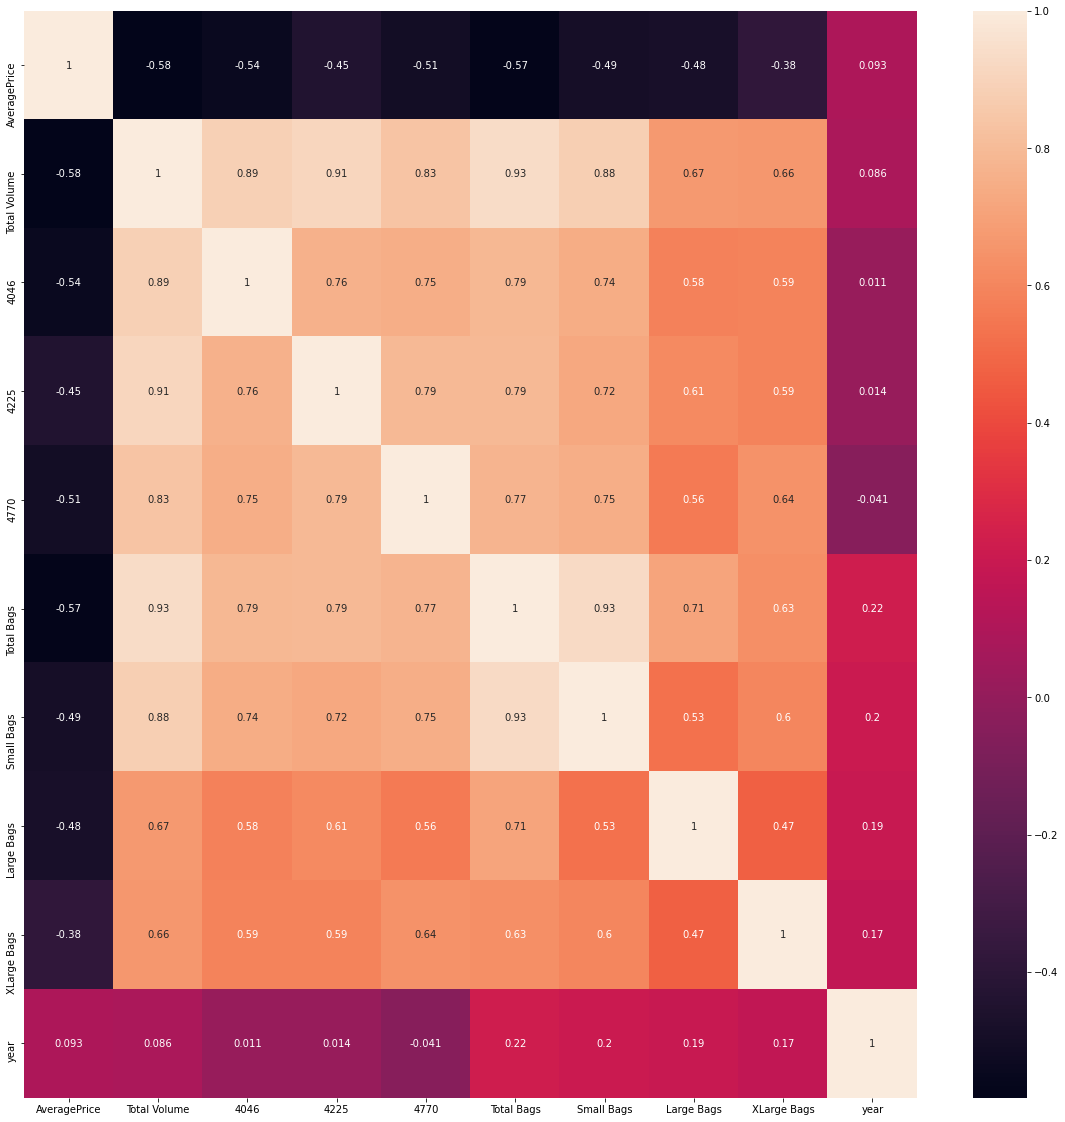

In [50]:
# Checking the correlation

df_cor= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor, annot= True)
plt.plot()

# Model Training

In [30]:
# use sckitlearn library and split your dataset into train_set and test_set
# IMPORTANT --> consider 25% of your dataset as the test_set (random_state=42)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.33, random_state=42)

In [31]:
train_set

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7660,2017-06-04,1.38,12.472477,11.137600,11.594849,7.813212,11.306376,11.262460,7.456316,7.476472,conventional,2017,RichmondNorfolk
3837,2016-03-13,1.03,12.095521,9.386337,11.489967,9.782157,10.853243,10.261637,9.866776,8.245608,conventional,2016,Indianapolis
2582,2015-05-03,1.40,10.831556,6.454585,10.094210,2.986187,10.155704,10.142768,5.804532,0.000000,conventional,2015,Syracuse
15670,2017-06-18,2.14,10.075469,6.311699,9.548481,2.061787,9.124118,9.038314,6.627155,0.000000,organic,2017,HartfordSpringfield
15376,2017-01-01,1.06,9.659557,8.321585,5.746555,0.000000,9.327951,9.318150,4.706824,0.000000,organic,2017,DallasFtWorth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2015-06-28,1.55,9.468670,7.782870,9.230842,0.000000,5.838809,5.838809,0.000000,0.000000,organic,2015,SanDiego
11964,2016-05-22,1.55,7.085115,3.322154,5.849872,0.000000,6.710706,6.710706,0.000000,0.000000,organic,2016,Albany
5390,2016-05-01,1.31,11.331508,6.900972,10.914206,6.646481,10.192303,10.192303,0.000000,0.000000,conventional,2016,Syracuse
860,2015-06-14,1.13,12.533864,10.663526,11.852285,7.615451,11.433684,11.384564,7.945346,7.382535,conventional,2015,HarrisburgScranton


In [32]:
# split inputs and output (AveragePrice)
df_labels = train_set['AveragePrice'].copy()
df_tr = train_set.drop('AveragePrice', axis=1)

In [34]:
df_tr

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7660,2017-06-04,12.472477,11.137600,11.594849,7.813212,11.306376,11.262460,7.456316,7.476472,conventional,2017,RichmondNorfolk
3837,2016-03-13,12.095521,9.386337,11.489967,9.782157,10.853243,10.261637,9.866776,8.245608,conventional,2016,Indianapolis
2582,2015-05-03,10.831556,6.454585,10.094210,2.986187,10.155704,10.142768,5.804532,0.000000,conventional,2015,Syracuse
15670,2017-06-18,10.075469,6.311699,9.548481,2.061787,9.124118,9.038314,6.627155,0.000000,organic,2017,HartfordSpringfield
15376,2017-01-01,9.659557,8.321585,5.746555,0.000000,9.327951,9.318150,4.706824,0.000000,organic,2017,DallasFtWorth
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2015-06-28,9.468670,7.782870,9.230842,0.000000,5.838809,5.838809,0.000000,0.000000,organic,2015,SanDiego
11964,2016-05-22,7.085115,3.322154,5.849872,0.000000,6.710706,6.710706,0.000000,0.000000,organic,2016,Albany
5390,2016-05-01,11.331508,6.900972,10.914206,6.646481,10.192303,10.192303,0.000000,0.000000,conventional,2016,Syracuse
860,2015-06-14,12.533864,10.663526,11.852285,7.615451,11.433684,11.384564,7.945346,7.382535,conventional,2015,HarrisburgScranton


In [35]:
# split numerical and categorical columns
df_num = df_tr.drop(['type','Date','region'], axis=1)
df_cat = df_tr[['type']]
df_region = df_tr[['region']]

In [36]:
df_cat

,type
7660,conventional
3837,conventional
2582,conventional
15670,organic
15376,organic
...,...
11284,organic
11964,organic
5390,conventional
860,conventional


In [37]:
df_region

,region
7660,RichmondNorfolk
3837,Indianapolis
2582,Syracuse
15670,HartfordSpringfield
15376,DallasFtWorth
...,...
11284,SanDiego
11964,Albany
5390,Syracuse
860,HarrisburgScranton


In [38]:
# generate numerical pipeline to take care of missing values and scale the dataset
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [40]:
# generate full pipeline to take care of numerical and categorical data (use OneHotEncoder)
num_attribs = list(df_num)
cat_attribs = ["type"]
region_attrib = list(df_region)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("matrix", OneHotEncoder(), region_attrib),
    ])

In [41]:
# apply full pipeline to training set and prepare the data for training ML model
df_tr_prepared = full_pipeline.fit_transform(df_tr)

In [42]:
df_tr_prepared.toarray()

array([[ 4.97554364e-01,  6.29647458e-01,  6.16596117e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.33319092e-01,  1.09767157e-01,  5.79769148e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.17375697e-01, -7.60553082e-01,  8.96781432e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.47385979e-04, -6.28038529e-01,  3.77602663e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.24300060e-01,  4.88913608e-01,  7.06989358e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.37463777e+00, -7.93411687e-01, -9.08203096e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [46]:
# use prepared data and output and train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_tr_prepared, df_labels)

# use prepared data and output and train a second degree polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly_2_features = PolynomialFeatures(degree=2, include_bias=False)
df_prepared_poly_2 = poly_2_features.fit_transform(df_tr_prepared)

poly_reg_2 = LinearRegression()
poly_reg_2.fit(df_prepared_poly_2, df_labels)

LinearRegression()

In [47]:
##################### use prepared data and output and train a third degree polynomial regression model#################

In [48]:
df_tr_predictions = lin_reg.predict(df_tr_prepared)

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(df_labels, df_tr_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.22494290448245494

In [51]:
# prepare the test set to test the trained model
df_tr_prepared_poly_2 = poly_2_features.fit_transform(df_tr_prepared)

# use trained second degree regression model and perform prediction on the prepared test set
df_tr_predictions_2 = poly_reg_2.predict(df_tr_prepared_poly_2)

In [52]:
# calculate rmse for tested model
poly_2_mse = mean_squared_error(df_labels, df_tr_predictions_2)
poly_2_rmse = np.sqrt(poly_2_mse)
poly_2_rmse

0.16105286409876726

In [53]:
# train a second degree ridge regression on prepared data
from sklearn.linear_model import Ridge
ridge_reg_2 = Ridge(alpha=1.2, solver="cholesky", fit_intercept=False)
ridge_reg_2.fit(df_prepared_poly_2, df_labels)

Ridge(alpha=1.2, fit_intercept=False, solver='cholesky')

In [54]:
# use second degree ridge regression and do prediction on prepared test set
df_tr_ridge_predictions_2 = ridge_reg_2.predict(df_tr_prepared_poly_2)

In [55]:
# calculate RMSE
# if the RMSE is not satisfying, go back, use different alpha (between 0 and 1) and try to find the best alpha (alpha which result in smallest RMSE)
ridge_poly_2_mse = mean_squared_error(df_labels, df_tr_ridge_predictions_2)
ridge_poly_2_rmse = np.sqrt(ridge_poly_2_mse)
ridge_poly_2_rmse

0.16586268504929194

In [56]:
# train a second degree elastic net on prepared data
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.1)
elastic_net.fit(df_prepared_poly_2, df_labels)

ElasticNet(alpha=0.001, l1_ratio=0.1)

In [57]:
#  use second degree elastic net and do prediction on prepared test set
df_tr_elastic_predictions_2 = elastic_net.predict(df_tr_prepared_poly_2)

In [58]:
# calculate RMSE
# if the RMSE is not satisfying, go back, use different alpha (between 0 and 1) and l1_ratio (between 0 and 1) and try to find the best alpha/l1_ratio (alpha/l1_ratio which result in smallest RMSE)
elastic_poly_2_mse = mean_squared_error(df_labels, df_tr_elastic_predictions_2)
elastic_poly_2_rmse = np.sqrt(elastic_poly_2_mse)
elastic_poly_2_rmse

0.18750071539374544

In [59]:
# prepare the test set to test the trained model
df_test = test_set.drop("AveragePrice", axis=1)
df_test_labels = test_set["AveragePrice"].copy()

df_test_prepared = full_pipeline.fit_transform(df_test)

In [60]:
# use trained linear regression model and perform prediction on the prepared test set
df_test_predictions = lin_reg.predict(df_test_prepared)

In [61]:
# calculate rmse for tested model
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(df_test_labels, df_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2263915108805546

In [64]:
# prepare the test set to test the trained model
df_test_prepared_poly_2 = poly_2_features.fit_transform(df_test_prepared)

# use trained second degree regression model and perform prediction on the prepared test set
df_test_predictions_2 = poly_reg_2.predict(df_test_prepared_poly_2)

# calculate rmse for tested model
poly_2_mse = mean_squared_error(df_test_labels, df_test_predictions_2)
poly_2_rmse = np.sqrt(poly_2_mse)
poly_2_rmse

0.17470064503646932

In [65]:
# train a second degree ridge regression on prepared data
from sklearn.linear_model import Ridge
ridge_reg_2 = Ridge(alpha=0.8, solver="cholesky", fit_intercept=False)
ridge_reg_2.fit(df_prepared_poly_2, df_labels)

Ridge(alpha=0.8, fit_intercept=False, solver='cholesky')

In [68]:
# use second degree ridge regression and do prediction on prepared test set
df_test_ridge_predictions_2 = ridge_reg_2.predict(df_test_prepared_poly_2)

# calculate RMSE
# if the RMSE is not satisfying, go back, use different alpha (between 0 and 1) and try to find the best alpha (alpha which result in smallest RMSE)
ridge_poly_2_mse = mean_squared_error(df_test_labels, df_test_ridge_predictions_2)
ridge_poly_2_rmse = np.sqrt(ridge_poly_2_mse)
ridge_poly_2_rmse



0.173737174136103

In [69]:
# train a second degree elastic net on prepared data
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.1)
elastic_net.fit(df_prepared_poly_2, df_labels)

ElasticNet(alpha=0.001, l1_ratio=0.1)

In [71]:
# use second degree elastic net and do prediction on prepared test set
df_test_elastic_predictions_2 = elastic_net.predict(df_test_prepared_poly_2)

# calculate RMSE
# if the RMSE is not satisfying, go back, use different alpha (between 0 and 1) and l1_ratio (between 0 and 1) and try to find the best alpha/l1_ratio (alpha/l1_ratio which result in smallest RMSE)
elastic_poly_2_mse = mean_squared_error(df_test_labels, df_test_elastic_predictions_2)
elastic_poly_2_rmse = np.sqrt(elastic_poly_2_mse)
elastic_poly_2_rmse

0.1917381453775365

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=500, random_state=42)
forest_reg.fit(df_tr_prepared, df_labels)

RandomForestRegressor(n_estimators=500, random_state=42)

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

df_predictions = forest_reg.predict(df_tr_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05774693803948714

In [74]:
df_test_predictions = forest_reg.predict(df_test_prepared)
forest_mse = mean_squared_error(df_test_labels, df_test_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.15768996750997108

In [75]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [76]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_tr_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.16357056 0.15757987 0.15977001 0.16636587 0.16327356]
Mean: 0.1621119735623932
Standard Deviation: 0.003085356278320656


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #### try 12 (3×4) combinations of hyperparameters
    #{'n_estimators': [10, 100, 300], 'max_features': [2, 4, 6, 8]},
    #### then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [10, 100], 'max_features': [30,40,70]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
#### train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_tr_prepared, df_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [False], 'max_features': [30, 40, 70],
                          'n_estimators': [10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 30, 'n_estimators': 100}

In [80]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=30, random_state=42)

In [81]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.169807524877185 {'bootstrap': False, 'max_features': 30, 'n_estimators': 10}
0.16169136514743623 {'bootstrap': False, 'max_features': 30, 'n_estimators': 100}
0.173116497711349 {'bootstrap': False, 'max_features': 40, 'n_estimators': 10}
0.16435381826712686 {'bootstrap': False, 'max_features': 40, 'n_estimators': 100}
nan {'bootstrap': False, 'max_features': 70, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 70, 'n_estimators': 100}


In [83]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([9.32589078e-02, 9.74934363e-02, 7.07225182e-02, 3.64611464e-02,
       6.50544471e-02, 6.35899427e-02, 8.05233464e-02, 1.54367817e-02,
       4.87159900e-02, 1.67746625e-01, 1.40417465e-01, 4.93592365e-04,
       9.13843811e-04, 5.20921604e-04, 2.02054548e-03, 1.47916043e-03,
       2.78357464e-03, 1.21956171e-03, 8.61852312e-04, 1.41485186e-03,
       1.92330580e-03, 1.74147589e-03, 3.00555506e-03, 3.33014937e-03,
       7.02174146e-04, 2.29764906e-03, 2.84512938e-04, 8.40774354e-04,
       1.28011753e-02, 4.24138766e-03, 1.70011634e-03, 7.01979838e-04,
       3.01957292e-03, 2.45183452e-03, 2.95472968e-03, 2.31582458e-03,
       1.64637826e-04, 1.83105354e-03, 7.87222270e-04, 6.41863750e-03,
       3.18026802e-03, 1.07184493e-03, 1.52240027e-03, 2.38620702e-03,
       3.64833915e-03, 1.82183720e-03, 1.78339163e-03, 2.73447298e-03,
       2.52516974e-03, 2.12279873e-03, 1.55676443e-03, 1.93017805e-03,
       9.89900018e-04, 1.27590770e-02, 2.85292102e-03, 7.08353849e-04,
      

In [84]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [85]:
from sklearn.model_selection import cross_val_score

ridge_scores = cross_val_score(ridge_reg_2, df_tr_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=20)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [0.22489756 0.2217856  0.23410188 0.2237746  0.2073871  0.23023555
 0.23094363 0.21486058 0.22040897 0.21902951 0.22920431 0.2298524
 0.21883189 0.23928282 0.24086171 0.23988213 0.22551169 0.22357991
 0.22397702 0.22373228]
Mean: 0.2261070571754384
Standard Deviation: 0.008258121499785455


In [87]:
avo = pd.read_csv("avocado.csv")

In [90]:
avo = df[df['region'] == 'TotalUS'].drop(['Date','region'], axis=1)
avo = avo[df['type'] == 'organic']

Predicted avicado price in Entire US in 2019 is: 1.699987 USD


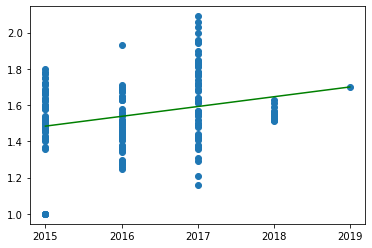

In [91]:
from scipy import stats

X_lin = avo['year'].reset_index(drop=True)
y_lin = avo['AveragePrice'].reset_index(drop=True)


slope, intercept, r, p, std_err = stats.linregress(X_lin, y_lin) # scipy

def prediction(x):
  return slope * x + intercept

name = 'Avg. Avocado price (organic) in 2019'
md = list(map(prediction, X_lin)) # scipy

X_pred_lin = 2019
y_pred_lin = prediction(X_pred_lin)

print('Predicted avicado price in Entire US in 2019 is: %f USD' % y_pred_lin)

X_lin2 = X_lin.append(pd.Series(X_pred_lin))
y_lin2 = y_lin.append(pd.Series(y_pred_lin))
md2 = list(map(prediction, X_lin2)) 

plt.scatter(X_lin2, y_lin2) # Scatter Plot
plt.plot(X_lin2, md2, color='green')
plt.xticks(np.arange(min(X_lin2), max(X_lin2+1), 1.0))
plt.show()

Here we can see the price of avocado. 

END